In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-linear-regression-dataset/multiple_linear_regression_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in the dataset
df = pd.read_csv("/kaggle/input/multiple-linear-regression-dataset/multiple_linear_regression_dataset.csv")

In [4]:
print(df.head())

   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830


In [6]:
print(df)

    age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700


In [5]:
print(df.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes
None


In [13]:
print(df.isnull().sum(axis=0))
print(df.isna().sum(axis=0))

age           0
experience    0
income        0
dtype: int64
age           0
experience    0
income        0
dtype: int64


In [15]:
print(df.dtypes)

age           int64
experience    int64
income        int64
dtype: object


In [20]:
# split the data into inputs and output
X = df.drop(["income"],axis=1)
y = df["income"]

In [21]:
print("Shape of the data matrix:",X.shape)
print("Shape of the labels vector:",y.shape)

Shape of the data matrix: (20, 2)
Shape of the labels vector: (20,)


In [22]:
# lets convert them into numpy arrays
X = np.array(X)
y = np.array(y)

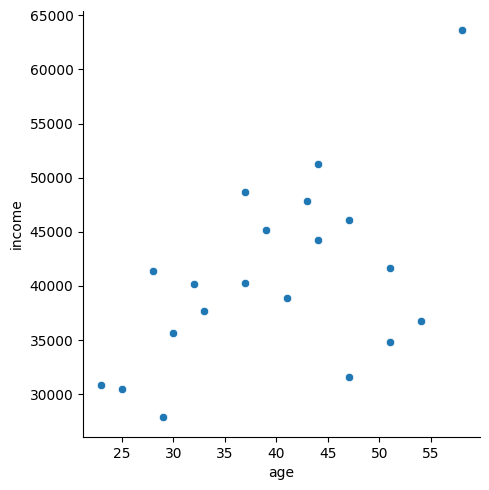

In [39]:
sns.relplot(x=df["age"],y=df["income"],data=df,kind="scatter")

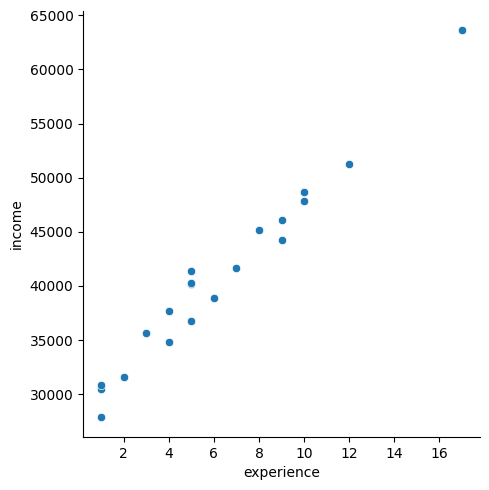

In [40]:
sns.relplot(x=df["experience"],y=df["income"],data=df,kind="scatter")

In [23]:
# import standard scaler or minmax scaler 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minmaxscale = MinMaxScaler()

# fit the object minmaxscale
minmaxscale.fit(X)

MinMaxScaler()

In [32]:
# lets see some stats about the fit 
print("maximum value in each feature:",minmaxscale.data_max_)
print("minimum value in each feature:",minmaxscale.data_min_)
print("range of values in each feature:",minmaxscale.data_range_)
print("number of features seen during fitting:",minmaxscale.n_features_in_)
print("number of samples/data points seen during fitting:",minmaxscale.n_samples_seen_)

maximum value in each feature: [58. 17.]
minimum value in each feature: [23.  1.]
range of values in each feature: [35. 16.]
number of features seen during fitting: 2
number of samples/data points seen during fitting: 20


In [33]:
# tranform the data (feature scaling!)
X_new = minmaxscale.transform(X)
print("shape of X_new:",X_new.shape)

shape of X_new: (20, 2)


In [36]:
print(X_new[:10])
print(X_new.min(axis=0))
print(X_new.max(axis=0))

[[0.05714286 0.        ]
 [0.2        0.125     ]
 [0.68571429 0.0625    ]
 [0.25714286 0.25      ]
 [0.57142857 0.5625    ]
 [0.8        0.375     ]
 [0.14285714 0.25      ]
 [0.28571429 0.1875    ]
 [0.4        0.25      ]
 [0.45714286 0.4375    ]]
[0. 0.]
[1. 1.]


In [41]:
print(X_new.shape)
print(y.shape)

(20, 2)
(20,)


In [42]:
# splitting the dataset after preprocessing into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=12,shuffle=True)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16, 2)
X_test shape: (4, 2)
y_train shape: (16,)
y_test shape: (4,)


In [44]:
# lets fit a multiple linear regression model on two independent features!
from sklearn.linear_model import LinearRegression

# instatiate the model (linear regressor)
model = LinearRegression()

# fit the model (learn the coeffiecients!)
model.fit(X_train,y_train)

# evaluate the model using R2 (coefficient of determination) on training and testing 
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print("the amount of variability of the dependent var explained by the independent vars on training set:",train_score)
print("the amount of variability of the dependent var explained by the independent vars on testing set:",test_score)

the amount of variability of the dependent var explained by the independent vars on training set: 0.9762574027253557
the amount of variability of the dependent var explained by the independent vars on testing set: 0.9864891067666091


In [58]:
# lets evaluate the model on the testing set using mean squred error 
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_preds = model.predict(X_test)
print("model predictions smaples:",np.array(list(map(int,np.round(y_preds[:10])))))
print("observed values samples:",y_test[:10])
print("seems like the error going to be low hahaha!")

model predictions smaples: [49193 34786 44653 36556]
observed values samples: [48700 34800 45150 37650]
seems like the error going to be low hahaha!


In [61]:
# lets check that thing 
mse = mean_squared_error(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
print("mean squared error (residuals) on testing data:",np.round(mse))
print("mean absolute error on testing data:",np.round(mae))

mean squared error (residuals) on testing data: 421717.0
mean absolute error on testing data: 524.0


In [63]:
# lets inspect the model's internal mechanics (parameters) ohhhhh 
model_params = {"age":model.coef_[0],"experience":model.coef_[1],"bias":model.intercept_}
for p,v in model_params.items():
    print(f"the feature {p} has a coefficient value of {v}")

the feature age has a coefficient value of -3441.5772001935907
the feature experience has a coefficient value of 34746.83353441988
the feature bias has a coefficient value of 31024.383380026316


In [75]:
def my_model(x_in,model_pms):
    """
    this function builds a model from the params and predicts 
    the output given the input
    Args:
        x_in (ndarray): 1 ndarray consisting of values of indepedent variables
                        including age and experience
    Returns:
        inc (float): income value representing the salary of the employee
    """
    w_0 = model_pms["bias"]
    w_1 = model_pms["age"]
    w_2 = model_pms["experience"]
    
    functional_model = w_0 + w_1 * np.squeeze(x_in)[0] + w_2 * np.squeeze(x_in)[1]
    
    return functional_model

In [85]:
# apply relu to negate any negative value for income 
def relu(x):
    return max(0,x)

In [86]:
age = int(input("Enter your age: "))
exp = float(input("Enter your years of experience"))
sample_input = np.expand_dims(np.array([age,exp]),axis=0)
sample_output = my_model(sample_input,model_params)
print("according to the info given, you expected salary (income):",np.round(relu(sample_output),4),"$")

Enter your age:  20
Enter your years of experience 1


according to the info given, you expected salary (income): 0 $


# ***Thats was really awesome right hahaha lets move on to the next one!***

# ***Thanks for watching :) Kidding I hope you find my notebook helpful!***